### 1) Simple quantum operation with Cirq

In [1]:
# Importing required libraries
import cirq
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initializing the qubits
q0 = cirq.NamedQubit("q0")
q1 = cirq.NamedQubit("q1")
q2 = cirq.NamedQubit("q2")
q3 = cirq.NamedQubit("q3")
q4 = cirq.NamedQubit("q4")

In [3]:
# Creating a quantum circuit
circuit = cirq.Circuit()
circuit.append([
    cirq.H(q0),
    cirq.H(q1),
    cirq.H(q2),
    cirq.H(q3),
    cirq.H(q4),
    cirq.CNOT(q0, q1),
    cirq.CNOT(q1, q2),
    cirq.CNOT(q2, q3),
    cirq.CNOT(q3, q4),
    cirq.SWAP(q0, q4),
    cirq.rx(math.pi/2).on(q2)
])

print('Quantum Circuit\n')
print(circuit)

Quantum Circuit

q0: ───H───@──────────────────────×───
           │                      │
q1: ───H───X───@──────────────────┼───
               │                  │
q2: ───H───────X───@───Rx(0.5π)───┼───
                   │              │
q3: ───H───────────X───@──────────┼───
                       │          │
q4: ───H───────────────X──────────×───


### 2) Quantum Circuit - series of small cirq.Rx rotations

In [4]:
# Initializing a qubit
qubit1 = cirq.NamedQubit("qubit1")

In [5]:
# Creating a quantum circuit with rotations on X
rx_circuit = cirq.Circuit()

rx_circuit.append([
    cirq.rx(math.pi).on(qubit1),
    cirq.rx(math.pi/3).on(qubit1),
    cirq.rx(math.pi/5).on(qubit1),
    cirq.measure(qubit1, key='q1') # 'q1' - a key for the measurment
])

print('Quantum Circuit\n')
print(rx_circuit)

Quantum Circuit

qubit1: ───Rx(π)───Rx(0.333π)───Rx(0.2π)───M('q1')───


In [6]:
# running on the simulator
simulator = cirq.Simulator()

experiment_1 = simulator.run(rx_circuit, repetitions=1)
print('Measured value of qubit1: ', experiment_1)

Measured value of qubit1:  q1=1


In [7]:
# counting the occurances of each state of qubit
qubits_dict = experiment_1.histogram(key='q1')
print('Number of occurances of each qubit: ', qubits_dict)

Number of occurances of each qubit:  Counter({1: 1})


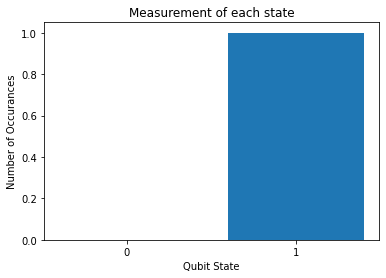

In [8]:
# plotting the number of occurances of each state after measurement
_ = cirq.vis.plot_state_histogram(experiment_1, plt.subplot(), title='Measurement of each state', xlabel='Qubit State', ylabel='Number of Occurances')

In [9]:
# running the simulator for 7 repetitions
experiment_2 = simulator.run(rx_circuit, repetitions=7)
print('Measured value of qubit1: ', experiment_2)

Measured value of qubit1:  q1=1100100


In [10]:
# counting the occurances of each state of qubit
qubits_dict = experiment_2.histogram(key='q1')
print('Number of occurances of each qubit: ', qubits_dict)

Number of occurances of each qubit:  Counter({0: 4, 1: 3})


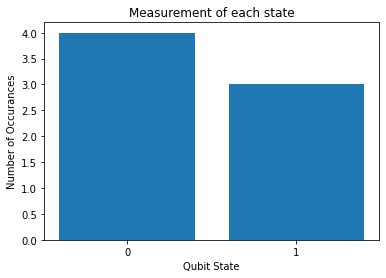

In [11]:
# plotting the number of occurances of each state of the qubit
_ = cirq.vis.plot_state_histogram(experiment_2, plt.subplot(), title='Measurement of each state', xlabel='Qubit State', ylabel='Number of Occurances')

Number of occurances of each qubit:  Counter({0: 4580, 1: 3612})


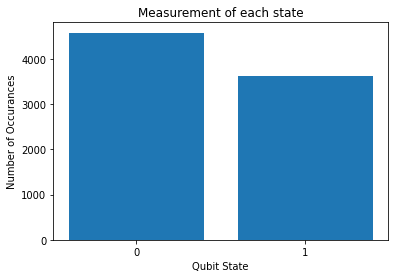

In [12]:
# running the simulator again for 8192 repetitions
experiment_3 = simulator.run(rx_circuit, repetitions=8192)
print('Number of occurances of each qubit: ', experiment_3.histogram(key='q1'))

# plotting the number of occurances of each state
_ = cirq.vis.plot_state_histogram(experiment_3, plt.subplot(), title='Measurement of each state', xlabel='Qubit State', ylabel='Number of Occurances')